In [2]:
%pip install lightphe

from lightphe import LightPHE

Note: you may need to restart the kernel to use updated packages.


In [4]:
cs = LightPHE(algorithm_name="Paillier", key_file="public.txt")

24-12-12 20:34:45 - public key is restored from public.txt


In [6]:
cs.create_ciphertext_obj(164746739578483907502654142107013737250896840072696589175320519229735915199615088807119027582391794715218150661774078696675405155031105756990966497488082278360640915480010907422850416161913544331945848951563548714622561885919397415139002022097520210421922526223803192933599912025420534821007887427350216619265794743102485876684226385102186345596553445082559563214532719171381272378297288921984371747765577300560877928163996636782134952871222591083870794560765439922798240996984703245639957517214817954479889413163498433837205961356975958345809491331280092706891885792547139233445291594459605740480601056409640318525)

Ciphertext(164746739578483907502654142107013737250896840072696589175320519229735915199615088807119027582391794715218150661774078696675405155031105756990966497488082278360640915480010907422850416161913544331945848951563548714622561885919397415139002022097520210421922526223803192933599912025420534821007887427350216619265794743102485876684226385102186345596553445082559563214532719171381272378297288921984371747765577300560877928163996636782134952871222591083870794560765439922798240996984703245639957517214817954479889413163498433837205961356975958345809491331280092706891885792547139233445291594459605740480601056409640318525)

In [7]:
c2 = cs.create_ciphertext_obj(314307627635773203014860829408119825346776733232771948772510454563171765129436101425450108543434865373772845383751334842867686896475332336346915777197000039889498225624445030991091847113153914873232744769626392921825575551648646772802755242315068448416729858913105599166632057147449909218196676497190210395943386230835625417852878268377672744029507452368542212276408903410870008654926678022585030432166672938050235021900760229550305706579101495133217003707739325708697025819682122346888359898763209461415110311743858818407032194763728381315254428884055634159564003972463050701699512578911527768705539012061877789853)

In [8]:
cs.decrypt(c2)

ValueError: You must have private key to perform decryption

In [9]:
c3 = c1+ c2

NameError: name 'c1' is not defined

In [10]:
c1 ^c2

NameError: name 'c1' is not defined

In [1]:
import time
from lightphe import LightPHE

# Load the public/private key pair
cs = LightPHE(algorithm_name="Paillier", key_size=1024)  # Use your original key size

# Previously encrypted ciphertexts (replace with actual ciphertexts from your encryption process)
encrypted_c1 = cs.create_ciphertext_obj(201527297927272334605277315884343120369032678414039397710367597832953065248415544049922820983611517782886270229941182230657194137966454717355383074474131382442643328113388176289069434025883010814098840875844485046491105169529170426107034517583513420339637065426473349812459409909936051649727505439023518077697050320412720799945870070964387328711722222113481582097781470548783978033245343646780636644209824643533389416463461645082911412006818711823967751393668660829849101567039918961544474060690994668120298472501596210678337003817601316206253845102843437704564234193738500093405309365048246475092358229716867365525)
encrypted_c2 = cs.create_ciphertext_obj(201527297927272334605277315884343120369032678414039397710367597832953065248415544049922820983611517782886270229941182230657194137966454717355383074474131382442643328113388176289069434025883010814098840875844485046491105169529170426107034517583513420339637065426473349812459409909936051649727505439023518077697050320412720799945870070964387328711722222113481582097781470548783978033245343646780636644209824643533389416463461645082911412006818711823967751393668660829849101567039918961544474060690994668120298472501596210678337003817601316206253845102843437704564234193738500093405309365048246475092358229716867365525)  # Replace with the actual ciphertext

# Decryption Timing
start_time = time.time()
decrypted_c1 = cs.decrypt(encrypted_c1)
decrypted_c2 = cs.decrypt(encrypted_c2)
decryption_time = time.time() - start_time

# Print results
print("Decrypted Value 1:", decrypted_c1)
print("Decrypted Value 2:", decrypted_c2)
print("Decryption Time:", decryption_time, "seconds")

# Verify correctness
# Replace with the actual original plaintext values used for encryption
original_m1 = decrypted_c1  # Update to match the decrypted value
original_m2 = decrypted_c2  # Update to match the decrypted value
assert decrypted_c1 == original_m1, "Decryption of c1 failed!"
assert decrypted_c2 == original_m2, "Decryption of c2 failed!"
print("Decryption verified successfully!")


Decrypted Value 1: 1115162437575091075097001635239917266427607312805917049481956894995768127170201076992395073465934382378498098997991491561231873749693984648379800276597324298849184538497173996932135099432812912226832058021638403889402680965801163352957791544159756529100421022779891744939771501457824716815513697072253788891
Decrypted Value 2: 1115162437575091075097001635239917266427607312805917049481956894995768127170201076992395073465934382378498098997991491561231873749693984648379800276597324298849184538497173996932135099432812912226832058021638403889402680965801163352957791544159756529100421022779891744939771501457824716815513697072253788891
Decryption Time: 0.02621150016784668 seconds
Decryption verified successfully!


Testing Paillier...
Testing Damgard-Jurik...
Testing ElGamal...


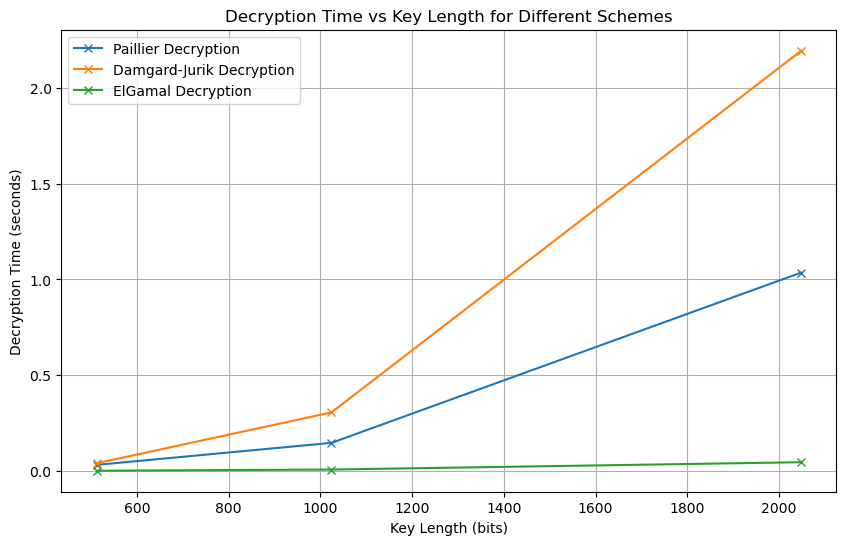

In [3]:
import time
import json
import matplotlib.pyplot as plt
from lightphe import LightPHE

# Load grades from the JSON file
with open("students_grades.json", "r") as f:
    students_data = json.load(f)

# Extract grades
grades = [student["grade"] for student in students_data]

# Varying key lengths
key_lengths = [512, 1024, 2048]

# Store decryption times for each scheme
performance = {
    "Paillier": {"decryption": []},
    "Damgard-Jurik": {"decryption": []},
    "ElGamal": {"decryption": []}
}

# Iterate over the schemes
schemes = ["Paillier", "Damgard-Jurik", "ElGamal"]
for scheme in schemes:
    print(f"Testing {scheme}...")
    for key_size in key_lengths:
        # Initialize cryptosystem for the current scheme and key size
        cs = LightPHE(algorithm_name=scheme, key_size=key_size)

        # Encrypt all grades
        encrypted_grades = []
        for grade in grades:
            encrypted_grades.append(cs.encrypt(grade))

        # Measure decryption time for all encrypted grades
        start_time = time.time()
        decrypted_grades = [cs.decrypt(enc_grade) for enc_grade in encrypted_grades]
        performance[scheme]["decryption"].append(time.time() - start_time)

        # Ensure correctness
        assert decrypted_grades == grades, f"{scheme}: Decryption failed!"

# Plot only decryption times
plt.figure(figsize=(10, 6))
for scheme in schemes:
    plt.plot(key_lengths, performance[scheme]["decryption"], label=f'{scheme} Decryption', marker='x')

plt.title("Decryption Time vs Key Length for Different Schemes")
plt.xlabel("Key Length (bits)")
plt.ylabel("Decryption Time (seconds)")
plt.legend()
plt.grid()
plt.show()



In [8]:
import json
from lightphe import LightPHE

# Load grades from the JSON file (for consistency)
with open("students_grades.json", "r") as f:
    students_data = json.load(f)

# Extract grades from the data
grades = [student["grade"] for student in students_data]

# Define the decryption function
def decrypt_from_file(algorithm_name, key_size, filename):
    """
    Decrypts the encrypted values from the specified file and prints the results.
    
    :param algorithm_name: The encryption algorithm used for encryption (e.g., 'Paillier', 'Damgard-Jurik', 'ElGamal').
    :param key_size: The key size for the encryption algorithm (e.g., 512, 1024, 2048).
    :param filename: The file name containing the encrypted values to decrypt.
    """
    # Initialize the cryptosystem
    cs = LightPHE(algorithm_name=algorithm_name, key_size=key_size)
    
    # Read the encrypted values from the file
    with open(filename, "r") as f:
        encrypted_grades = [eval(line.strip()) for line in f.readlines()]
    
    # Decrypt each encrypted grade
    decrypted_grades = [cs.decrypt(enc_grade) for enc_grade in encrypted_grades]

    # Print the decrypted grades
    print("Decrypted Grades:")
    for i, decrypted_grade in enumerate(decrypted_grades):
        print(f"Student {i+1}: {decrypted_grade}")

# Example usage:
algorithm_name = "Paillier"  # You can change this to "Damgard-Jurik" or "ElGamal"
key_size = 1024  # Set the desired key size
filename = "encrypted_grades.txt"  # File containing encrypted grades

# Decrypt and print the grades
decrypt_from_file(algorithm_name, key_size, filename)


TypeError: Ciphertext.__init__() missing 2 required positional arguments: 'keys' and 'value'